In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from astropy.io import fits

# 1) Load and cross-check Darth Fader redshift files

In [6]:
flist = glob.glob("/Users/brunomor/lib/python/dedale_d51/analysis/darth_fader_redshifts/2018-04-23_Florent_production_runs/zest*")
flist.sort()

In [3]:
_ = [print(os.path.basename(fname)) for fname in flist]

zest_GalTypeEllS0_SNR0p25.fits
zest_GalTypeEllS0_SNR0p5.fits
zest_GalTypeEllS0_SNR1.fits
zest_GalTypeEllS0_SNR2.fits
zest_GalTypeEllS0_SNR20.fits
zest_GalTypeEllS0_SNR5.fits
zest_GalTypeSB_SNR0p25.fits
zest_GalTypeSB_SNR0p5.fits
zest_GalTypeSB_SNR1.fits
zest_GalTypeSB_SNR2.fits
zest_GalTypeSB_SNR20.fits
zest_GalTypeSB_SNR5.fits
zest_GalTypeSaSc_SNR0p25.fits
zest_GalTypeSaSc_SNR0p5.fits
zest_GalTypeSaSc_SNR1.fits
zest_GalTypeSaSc_SNR2.fits
zest_GalTypeSaSc_SNR20.fits
zest_GalTypeSaSc_SNR5.fits
zest_GalTypeSdSm_SNR0p25.fits
zest_GalTypeSdSm_SNR0p5.fits
zest_GalTypeSdSm_SNR1.fits
zest_GalTypeSdSm_SNR2.fits
zest_GalTypeSdSm_SNR20.fits
zest_GalTypeSdSm_SNR5.fits


# 2) Load and cross-check True redshift files

In [11]:
property_files = glob.glob("/Users/brunomor/lib/python/dedale_d51/data/darth_fader/2018-04-13_lsst_galtype_runs/test_array*npy")
property_files.sort()

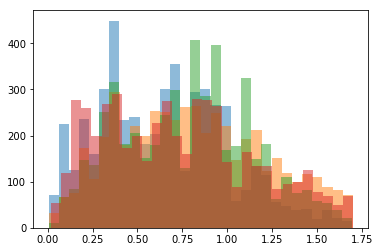

In [5]:
for fname in property_files:
    ztrue = np.load(fname)[:, 2]
    _ = plt.hist(ztrue, bins=30, alpha=0.5)

# Quick-and-dirty test: Check if redshifts in high signal-to-noise regimes are working

In [6]:
highsnrfiles = [fname for fname in flist if "Ell" in fname]

In [ ]:
# Objects:
    # Galaxy
        # Members
          # - True redshift
          # - Estimated redshift
          # - Additional properties

In [49]:
ls /Users/brunomor/Desktop/temp_work/2018-04-26_plots_saclay/

catouts_SNR0p25.png        scatter_SNR1_SB.png
catouts_SNR0p5.png         scatter_SNR1_SaSc.png
catouts_SNR1.png           scatter_SNR1_SdSm.png
catouts_SNR2.png           scatter_SNR20_EllS0.png
catouts_SNR20.png          scatter_SNR20_SB.png
catouts_SNR5.png           scatter_SNR20_SaSc.png
scatter_SNR0p25_EllS0.png  scatter_SNR20_SdSm.png
scatter_SNR0p25_SB.png     scatter_SNR2_EllS0.png
scatter_SNR0p25_SaSc.png   scatter_SNR2_SB.png
scatter_SNR0p25_SdSm.png   scatter_SNR2_SaSc.png
scatter_SNR0p5_EllS0.png   scatter_SNR2_SdSm.png
scatter_SNR0p5_SB.png      scatter_SNR5_EllS0.png
scatter_SNR0p5_SaSc.png    scatter_SNR5_SB.png
scatter_SNR0p5_SdSm.png    scatter_SNR5_SaSc.png
scatter_SNR1_EllS0.png     scatter_SNR5_SdSm.png


/Users/brunomor/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


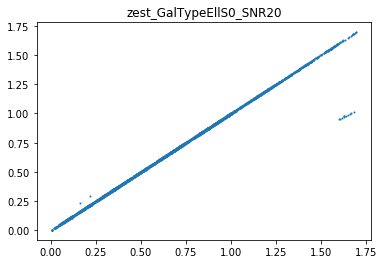

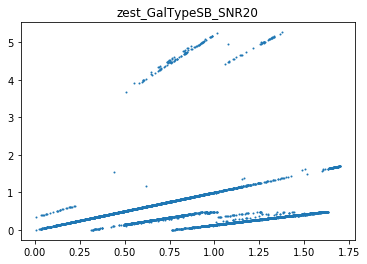

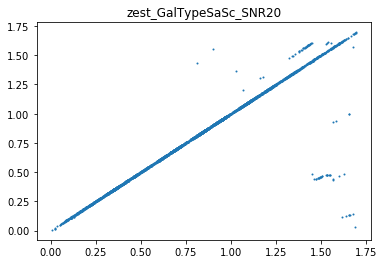

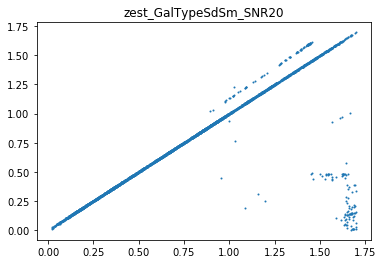

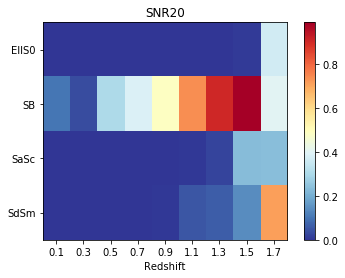

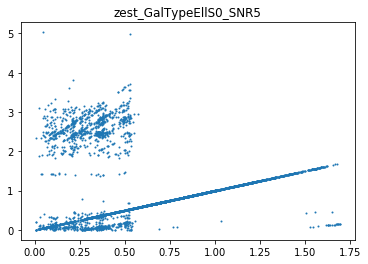

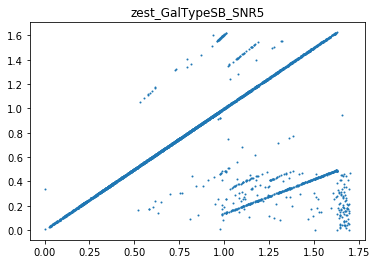

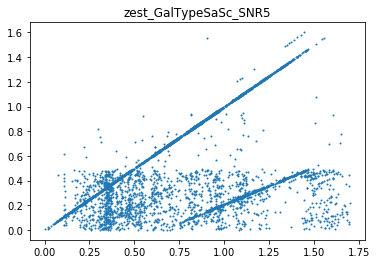

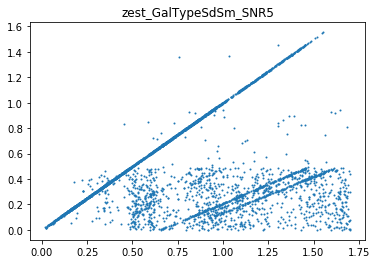

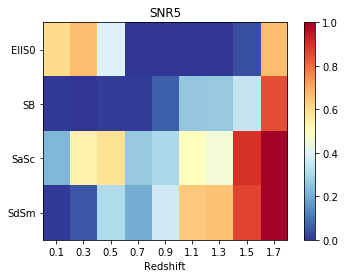

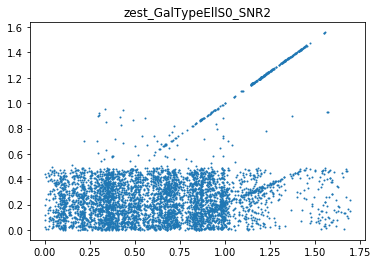

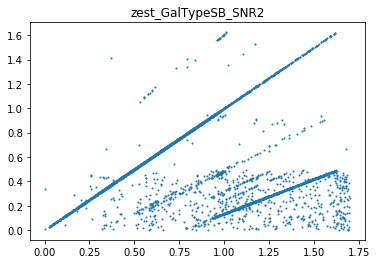

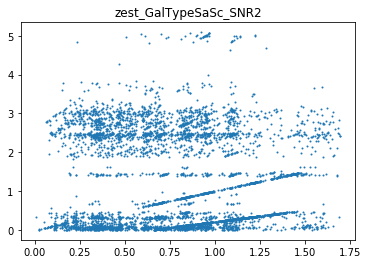

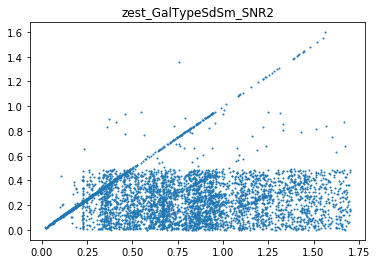

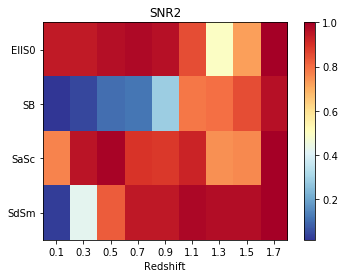

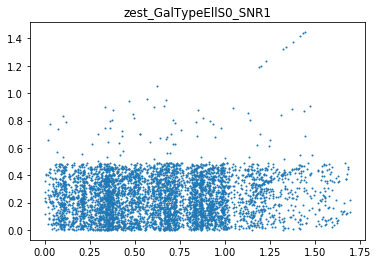

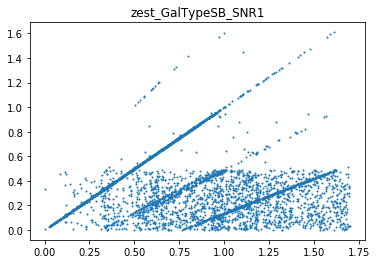

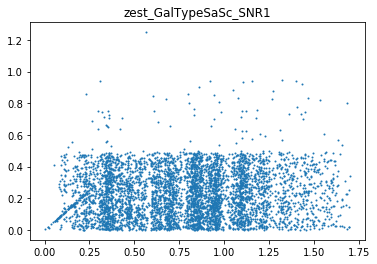

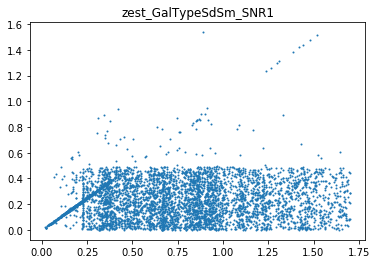

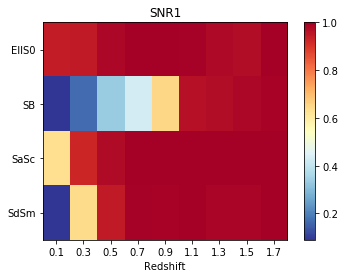

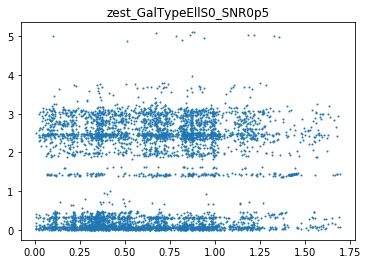

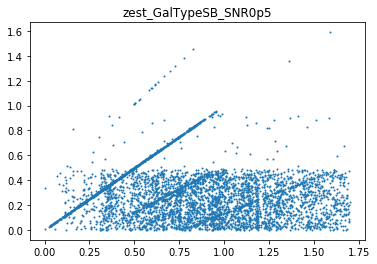

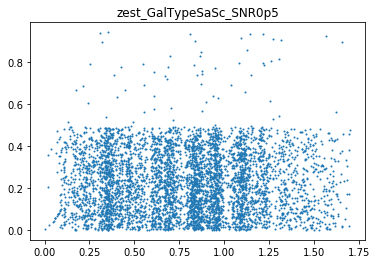

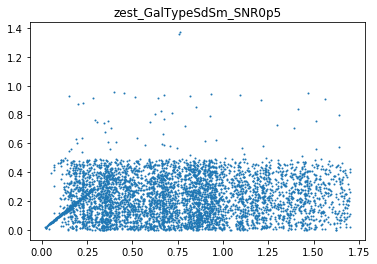

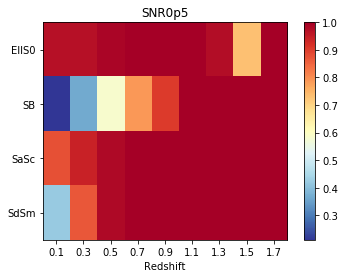

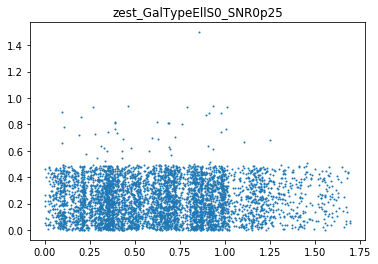

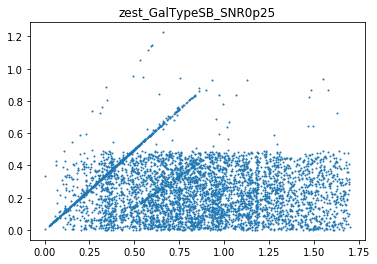

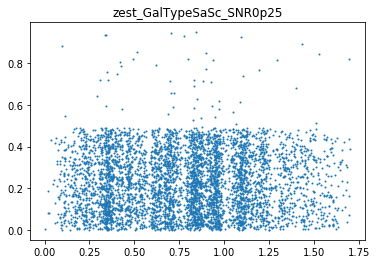

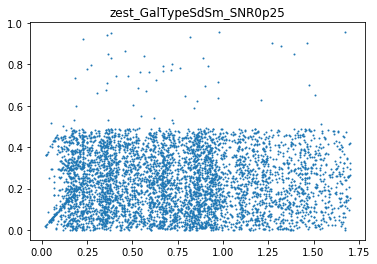

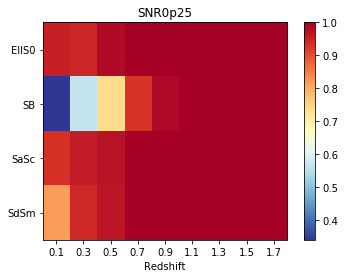

In [48]:
# PLOT CODE LOGIC
# for each signal-to-noise ratio:
    # for each type of galaxy:
        # plot scatter plot comparison (photo-z plot)
        # calculate statistics per redshift bin (photo-z plot)
        # plot 2D histogram of redshift per type
snr_runs = ["SNR20.", "SNR5.", "SNR2.", "SNR1.", "SNR0p5.", "SNR0p25."]
galtypes = ["EllS0", "SB", "SaSc", "SdSm"]

dz = 0.2
zbin_centers = np.arange(0.1, 1.71, dz)
catout_zlim = 0.01


for snr in snr_runs:
    catouts_snr = []
    
    for galtype in galtypes:
        # Read in files
        ztrue_fname = [elem for elem in property_files if (galtype in elem)]
        assert len(zest_fname) == 1, "You messed up."
        ztrue = np.load(ztrue_fname[0])[:, 2]
        
        zest_fname = [elem for elem in flist if (galtype in elem) and (snr in elem)]
        assert len(zest_fname) == 1, "You messed up."
        zest = fits.getdata(zest_fname[0])

        # Make basic scatter plots
        title = os.path.basename(zest_fname[0]).split(".")[0]
        plt.figure()
        plt.title(title)
        plt.plot(ztrue, zest, ".", markersize=2)
        plt.savefig("/Users/brunomor/Desktop/temp_work/2018-04-26_plots_saclay/scatter_%s_%s.png" % (snr[:-1], galtype))
        
        # Calculate basic statistics for 2d histogram
        catouts_galtype = []
        for zbin in zbin_centers:
            # Select 
            zinf = zbin - dz/2
            zsup = zbin + dz/2
            zmask = (ztrue >= zinf) & (ztrue < zsup)
            zbin_true = ztrue[zmask]
            zbin_est = zest[zmask]
            scatter = np.absolute(zbin_true - zbin_est)/(1 + zbin_true)
            catout_percent = np.sum(scatter > catout_zlim)/len(scatter)
            catouts_galtype.append(catout_percent)
        catouts_snr.append(catouts_galtype)
    catouts_snr = np.array(catouts_snr)
    plt.figure()
    plt.title(snr[:-1])
    plt.imshow(catouts_snr, aspect=2, cmap=plt.cm.RdYlBu_r)
    plt.xticks(range(len(zbin_centers)), zbin_centers)
    plt.yticks(range(len(galtypes)), galtypes)
    plt.xlabel("Redshift")
    plt.colorbar()
    plt.savefig("/Users/brunomor/Desktop/temp_work/2018-04-26_plots_saclay/catouts_%s.png" % snr[:-1])

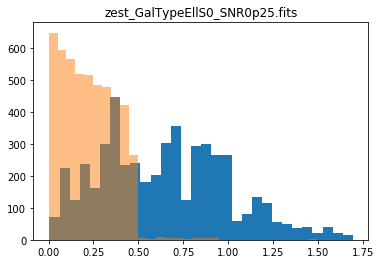

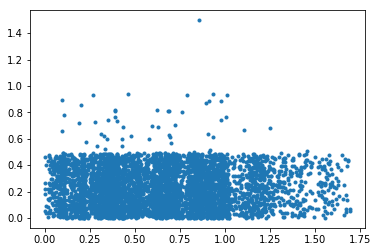

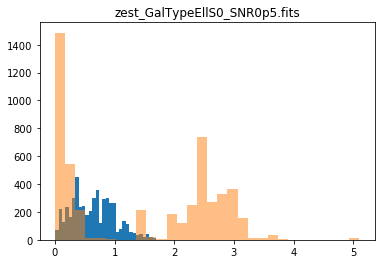

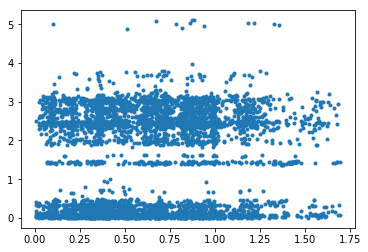

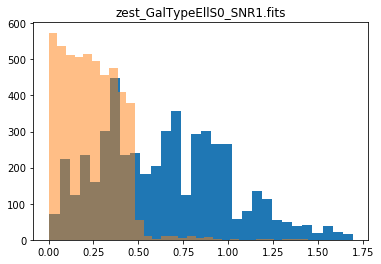

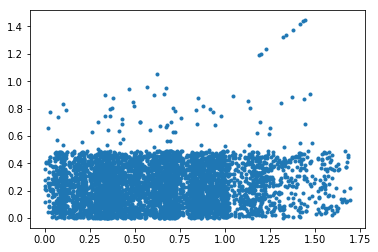

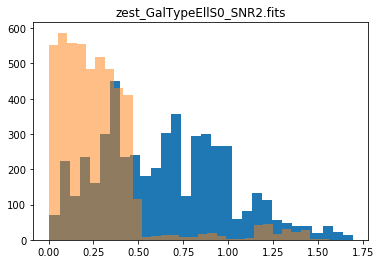

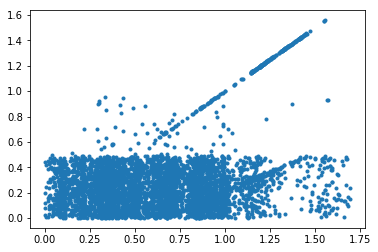

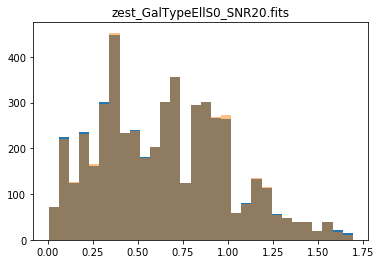

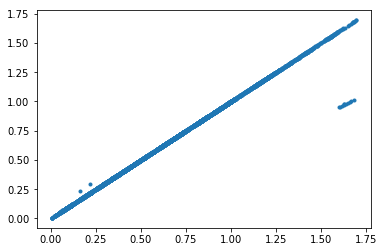

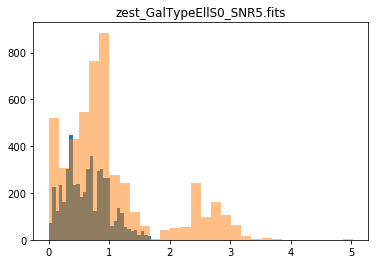

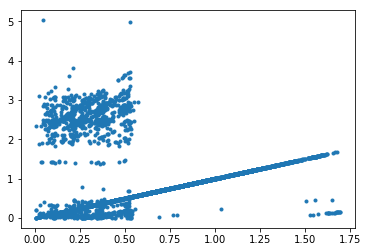

In [7]:
for estname, truename in zip(highsnrfiles, 6*[property_files[0]]):
    ztrue = np.load(truename)[:, 2]
    zest = fits.getdata(estname)
    plt.figure()
    plt.title(os.path.basename(estname))
    _ = plt.hist(ztrue, bins=30)
    _ = plt.hist(zest, bins=30, alpha=0.5)
    plt.figure()
    plt.plot(ztrue, zest, ".")